In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("../rubber_ducks.csv")
df.head()

,timestamp,duck_id,color,size,material,animal,pattern,theme,durability,popularity,price
0,2024-05-21 18:32:17,1,Multicolored,Large,Wood,Horse,NaN,Plain,6,3,6
1,2024-05-21 18:32:16,2,Yellow,Small,Wood,Horse,Striped,Superhero,5,3,5
2,2024-05-21 18:32:15,3,Silver,Medium,Metal,Eagle,Gradient,Witch,3,4,7
3,2024-05-21 18:32:14,4,Pink,XSmall,Glass,Dog,Floral,Plain,1,2,7
4,2024-05-21 18:32:13,5,Pink,Large,Plastic,Dinosaur,NaN,Wizard,9,5,4


In [115]:
df.describe()

,duck_id,durability,popularity,price
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,5.363200,3.179600,5.379400
std,1443.520003,2.518761,0.969294,2.126772
min,1.000000,1.000000,1.000000,2.000000
25%,1250.750000,3.000000,3.000000,4.000000
50%,2500.500000,5.000000,3.000000,5.000000
75%,3750.250000,7.000000,4.000000,7.000000
max,5000.000000,10.000000,5.000000,14.000000


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   timestamp   5000 non-null   object
 1   duck_id     5000 non-null   int64 
 2   color       5000 non-null   object
 3   size        5000 non-null   object
 4   material    5000 non-null   object
 5   animal      5000 non-null   object
 6   pattern     4310 non-null   object
 7   theme       5000 non-null   object
 8   durability  5000 non-null   int64 
 9   popularity  5000 non-null   int64 
 10  price       5000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


In [117]:
df['pattern'] = df['pattern'].fillna('Solid')
df.head()

,timestamp,duck_id,color,size,material,animal,pattern,theme,durability,popularity,price
0,2024-05-21 18:32:17,1,Multicolored,Large,Wood,Horse,Solid,Plain,6,3,6
1,2024-05-21 18:32:16,2,Yellow,Small,Wood,Horse,Striped,Superhero,5,3,5
2,2024-05-21 18:32:15,3,Silver,Medium,Metal,Eagle,Gradient,Witch,3,4,7
3,2024-05-21 18:32:14,4,Pink,XSmall,Glass,Dog,Floral,Plain,1,2,7
4,2024-05-21 18:32:13,5,Pink,Large,Plastic,Dinosaur,Solid,Wizard,9,5,4


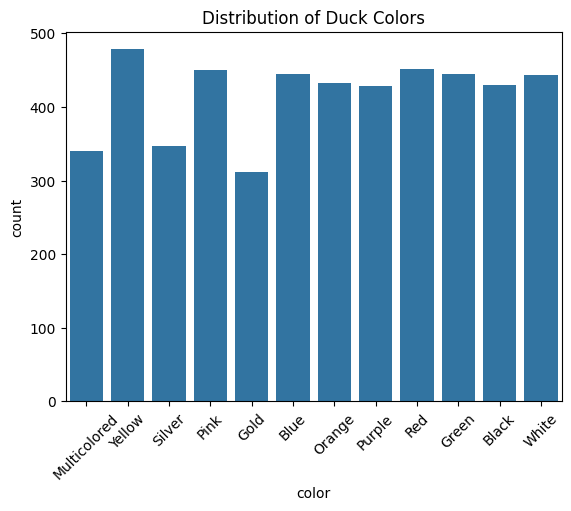

In [118]:
sns.countplot(x='color', data=df)
plt.xticks(rotation=45)
plt.title('Distribution of Duck Colors')
plt.show()

In [119]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import random

In [120]:
X = df[['color', 'size', 'material', 'animal', 'pattern', 'theme', 'durability', 'popularity', 'price']]
# y = df['price']
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
# Do one-hot encoding
categorical_features = ['color', 'size', 'material', 'animal', 'pattern', 'theme']
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

# Standard scale numeric features
numeric_features = ['durability', 'popularity', 'price']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [122]:
k = 9

# Create pipeline to first process the data and then apply NearestNeighbors
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('nearestneighbors', NearestNeighbors(n_neighbors=k))
])

model.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['durability', 'popularity',
                                                   'price']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['color', 'size', 'material',
                                                   'animal', 'pattern',
                                                   'theme'])])),
                ('nearestneighbors', NearestNeighbors(n_neighbors=9))])

In [123]:
# sampling one duck to test the model
sample_duck = df.sample(n=1)[['color', 'size', 'material', 'animal', 'pattern', 'theme', 'durability', 'popularity', 'price']]
print(sample_duck)

# do encoding first to transform data
sample_duck_encoded = model[0:-1].transform(sample_duck)

# predict using kneighbors
predictions = model[-1].kneighbors(X=sample_duck_encoded, n_neighbors=9)

     color    size material animal    pattern     theme  durability  \
2294   Red  Medium   Rubber   Duck  Checkered  Princess           6   

      popularity  price  
2294           4      3  


In [124]:
print(predictions)

(array([[0.        , 1.73205081, 1.97276454, 2.        , 2.        ,
        2.01219901, 2.03890778, 2.05498175, 2.10598378]]), array([[3626, 1330, 2223, 2977,  476, 1036,  546,  936, 2184]],
      dtype=int64))


In [135]:
# get all nearest ducks
# for index in predictions[1]:
#     print(df.iloc[index])

print(df.iloc[predictions[1][0]])

                timestamp  duck_id         color    size material    animal  \
3626  2024-05-21 17:31:51     3627         Black  XLarge  Plastic      Lion   
1330  2024-05-21 18:10:07     1331          Blue  Medium    Metal   Giraffe   
2223  2024-05-21 17:55:14     2224          Blue  Medium   Rubber   Giraffe   
2977  2024-05-21 17:42:40     2978          Gold  XLarge     Wood       Dog   
476   2024-05-21 18:24:21      477         White   Large  Ceramic   Giraffe   
1036  2024-05-21 18:15:01     1037  Multicolored  Medium    Glass   Giraffe   
546   2024-05-21 18:23:11      547        Purple   Large    Metal     Eagle   
936   2024-05-21 18:16:41      937          Pink   Large  Plastic       Dog   
2184  2024-05-21 17:55:53     2185         Green   Small     Wood  Dinosaur   

      pattern     theme  durability  popularity  price  
3626   Floral     Plain           7           3      4  
1330  Glitter     Plain           7           2      4  
2223  Glitter     Plain           7   

In [127]:
import pickle

filename = "nearest_neighbors.pkl"

with open(filename, 'wb') as file:
    pickle.dump(model, file)